## Exercicio 01 - Regressão Multivariada
## SCC5871 - INTRODUÇÃO AO APRENDIZADO DE MÁQUINA
## PROFa. Dra. Roseli A. F. Romero

### Julyana Flores de Prá, Thiago Rafael Mariotti Claudio
### Dataset: Abalone

In [79]:
# deps
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [80]:
df_abalado = pd.read_csv('abalone.csv')
df_abalado

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [81]:
df_abalado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [82]:
df_abalado.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [83]:
df_abalado = df_abalado.drop('Sex', axis=1)    
df_abalado

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [84]:
corr = df_abalado.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

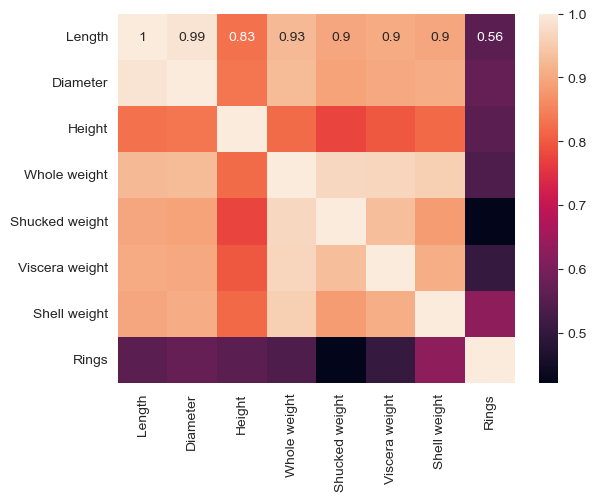

In [85]:
sns.heatmap(corr, annot=True)

In [86]:
X = df_abalado.drop(['Rings'],axis=1)
y = df_abalado['Rings']
X = preprocessing.normalize(X)

In [87]:
X

array([[0.54516543, 0.43733051, 0.11382575, ..., 0.26898822, 0.12101474,
        0.17972487],
       [0.67504231, 0.51110347, 0.17358231, ..., 0.19190489, 0.09354158,
        0.13500846],
       [0.51386887, 0.40721684, 0.13089113, ..., 0.24869314, 0.13719329,
        0.20360842],
       ...,
       [0.3822124 , 0.30258482, 0.13058924, ..., 0.33475436, 0.18314344,
        0.19620236],
       [0.41355572, 0.32091924, 0.09925337, ..., 0.35135694, 0.17270087,
        0.19585999],
       [0.29162231, 0.22795828, 0.08009345, ..., 0.38835055, 0.15464197,
        0.20331415]])

In [88]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [90]:
#REGRESSAO LINEAR
linearRegr = LinearRegression()
linearRegr.fit(X_train, y_train)
y_predict_linear = linearRegr.predict(X_test)

# mede a média da diferença entre o valor real com o predito; quanto maior pior
print("MAE: %.2f" % mean_absolute_error(y_test, y_predict_linear)) 

# igual à métrica MAE, porém a diferença é ^2, penalizando valores que sejam muito diferentes entre o previsto e o real; quanto maior pior
print("MSE: %.2f" % mean_squared_error(y_test, y_predict_linear)) 

# coeficiente de determinação, representa o percentual da variância dos dados que é explicado pelo modelo; quanto mais próx de 1, melhor
print("R2 Score: %.2f" % r2_score(y_test, y_predict_linear)) 

MAE: 1.52
MSE: 4.85
R2 Score: 0.54


In [91]:
# REGRESSÃO POLINOMIAL GRAU 2
polyFeatures= PolynomialFeatures(degree=2)
X_poly = polyFeatures.fit_transform(X_train)
X_poly_test = polyFeatures.fit_transform(X_test)

model = LinearRegression()
model.fit(X_poly, y_train)
y_predict_poly = model.predict(X_poly_test)

print("MAE: %.2f" % mean_absolute_error(y_test, y_predict_poly))
print("MSE: %.2f" % mean_squared_error(y_test, y_predict_poly))
print("R2 Score: %.2f" % r2_score(y_test, y_predict_poly))

MAE: 1.49
MSE: 4.50
R2 Score: 0.57


In [94]:
# REGRESSAO LINEAR LASSO (regularização L1)
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict_lasso = lasso.predict(X_test)

print("MAE: %.2f" % mean_absolute_error(y_test, y_predict_lasso))
print("MSE: %.2f" % mean_squared_error(y_test, y_predict_lasso))
print("R2 Score: %.2f" % r2_score(y_test, y_predict_lasso)) 

MAE: 2.42
MSE: 10.55
R2 Score: -0.00


In [93]:
# REGRESSAO LINEAR RIDGE (regularização L2)
ridge = Ridge()
ridge.fit(X_train, y_train)
y_predict_ridge = ridge.predict(X_test)

print("MAE: %.2f" % mean_absolute_error(y_test, y_predict_ridge))
print("MSE: %.2f" % mean_squared_error(y_test, y_predict_ridge))
print("R2 Score: %.2f" % r2_score(y_test, y_predict_ridge))

MAE: 1.53
MSE: 4.84
R2 Score: 0.54
